<a href="https://colab.research.google.com/github/engrtobechi/Data-Analysis-of-Nigerian-Elections/blob/main/Analyzing_the_2023_Nigerian_Presential_Election_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing Nigerian Presidential Election Results using Python

The 2023 Nigerian presidential election was held on February 25, 2023. In this Notebook, we will use Python to analyze a transcribed set of polling unit results scrapped from the [INEC IReV Portal](https://www.inecelectionresults.ng/) for Rivers State.


The data is in tabulated form and includes information about the state, local government area (LGA), ward, polling unit code (PU-Code), polling unit name (PU-Name), number of accredited voters, number of registered voters, and number of votes for each political party.

Our aim is to analyze the data, produce charts and discuss our findings.

####Credits:
- ObiDients on Twitter
- [Mark Essien's](https://twitter.com/markessien) for the [web application](https://forensic.nigeria2.com/) used in transcribing scrapped data from [INEC IReV Portal](https://www.inecelectionresults.ng/).

##Importing Data and Libraries
To begin, we need to import the necessary libraries and the data into Python. We will use pandas for data manipulation and matplotlib for data visualization.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("RIVERS_crosschecked.csv")

#let's describe the data
print(df.describe())

#also we set the font size for all plots in this work
plt.rcParams['font.size'] = 14

       Accredited_Voters  Registered_Voters  Transcription_Count          APC  \
count        4769.000000        4769.000000               4769.0  4769.000000   
mean           81.538897         511.215139                 -1.0    20.145943   
std            69.574095         497.710243                  0.0    33.541690   
min             0.000000           1.000000                 -1.0     0.000000   
25%            30.000000         133.000000                 -1.0     3.000000   
50%            66.000000         415.000000                 -1.0    10.000000   
75%           117.000000         750.000000                 -1.0    25.000000   
max           615.000000        7568.000000                 -1.0   562.000000   

                LP          PDP         NNPP  
count  4769.000000  4769.000000  4769.000000  
mean     42.022856    14.139233     0.295240  
std      59.052428    20.336017     1.847948  
min       0.000000     0.000000     0.000000  
25%       6.000000     2.000000    

##Data Cleaning
After importing the data, we need to clean it. In this case, we need to drop unnecessary columns and rows using the code below.

In [38]:
df = df.drop(['State', 'Ward', 'PU-Code', 'PU-Name', 'Transcription_Count', 'Results_File'], axis=1)


We dropped the 'State', 'Ward', 'PU-Code', 'PU-Name', 'Transcription_Count', and 'Results_File' columns as they are not useful for our analysis.

##Data Analysis
Next, we perform data analysis on the cleaned data. We start by looking at voter turnout accross the LGA(s) by creating a chart showing the number of accredited voters and registered voters and comparing them, we can use the following code:

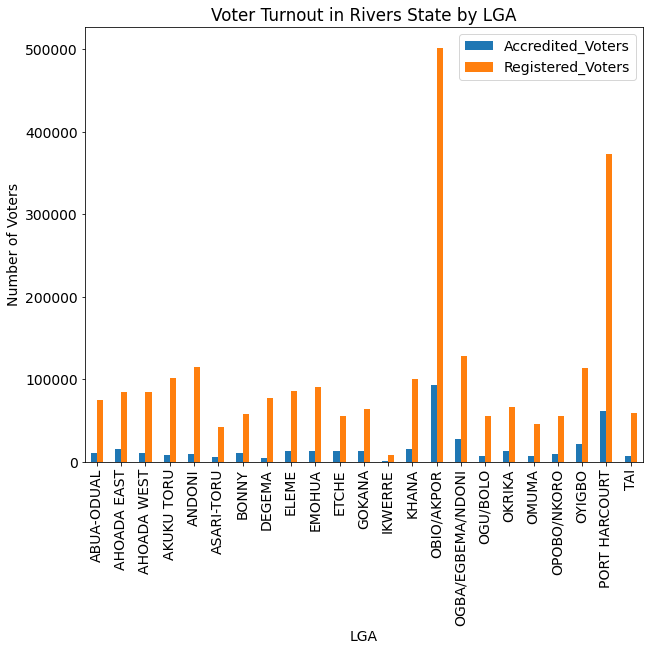

In [39]:
# group by LGA and calculate the total number of accredited and registered voters
voters_by_lga = df.groupby('LGA')[['Accredited_Voters', 'Registered_Voters']].sum()

# plot the bar chart
voters_by_lga.plot(kind='bar', rot=90, figsize=(10,8))
plt.title("Voter Turnout in Rivers State by LGA")
plt.xlabel("LGA")
plt.ylabel("Number of Voters")
plt.show()


We can see that some local government areas had significantly higher voter turnout than others.

This code will give us a horizontal bar chart with the top 10 LGA(s) with the highest voter turnout on the y-axis and the number of accredited voters on the x-axis. The `plt.gca().invert_yaxis()` line is added to invert the y-axis so that the LGA(s) are listed from top to bottom in descending order.

Note: You may need to adjust the figsize parameter to make the chart larger or smaller, depending on your preferences.

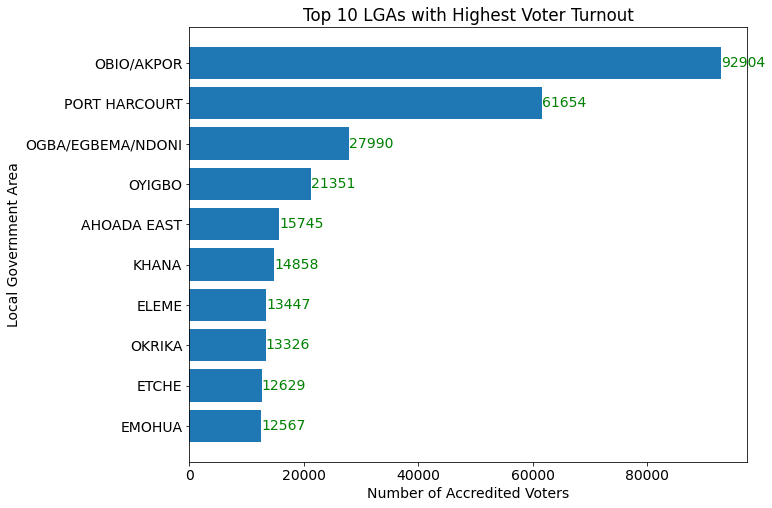

In [40]:
# sort the LGAs by voter turnout and select the top 10
top_lgas = df.groupby('LGA')['Accredited_Voters'].sum().sort_values(ascending=False)[:10]

# create a horizontal bar chart
plt.figure(figsize=(10,8))
plt.barh(top_lgas.index, top_lgas.values)

for i, v in enumerate(top_lgas.values):
  plt.text(v, i, str(v), color='green', va='center')

plt.xlabel('Number of Accredited Voters')
plt.ylabel('Local Government Area')
plt.title('Top 10 LGAs with Highest Voter Turnout')
plt.gca().invert_yaxis()
plt.show()


We see from the chart that all top ten LGA's with the highest voter turnout are urban and suburban local government areas with the Obio/Akpo and Port Harcout LGA recording the highest voter turnout. Ogba/Egbama/Ndoni and Ahoda East which is suburban made amongst others made it to the top 5. This is interesting.

###Which Party won in Rivers State?
To see this sum the votes for each party across all polling units and present it in a pie chart.

To create a pie chart showing the distribution of votes between the APC, LP, PDP, and NNPP parties, we can use the following code:

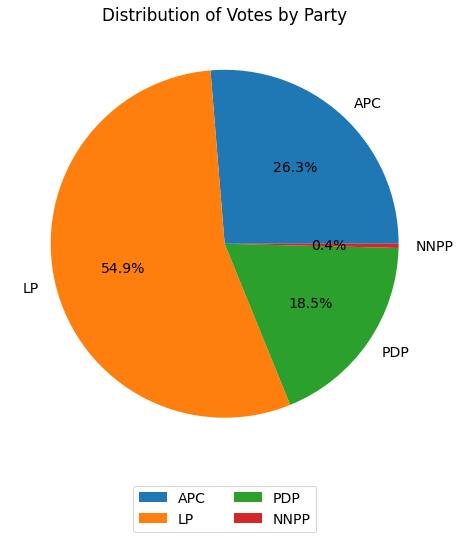

In [41]:
# Calculate total votes for each party
apc_votes = df['APC'].sum()
lp_votes = df['LP'].sum()
pdp_votes = df['PDP'].sum()
nnpp_votes = df['NNPP'].sum()

# Create a list of party names and their votes
parties = ['APC', 'LP', 'PDP', 'NNPP']
votes = [apc_votes, lp_votes, pdp_votes, nnpp_votes]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(votes, labels=parties, autopct='%1.1f%%')
plt.title('Distribution of Votes by Party')

plt.legend(labels=parties, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2)

plt.show()


###Analysis of Anomalies in the Election Result
We have to look at the electoral act as amended in 2022 to see what is not acceptable as regards the polling unit election results. 

According to **Section 60** of the [Electoral Act 2022](https://placng.org/i/wp-content/uploads/2022/02/Electoral-Act-2022.pdf), *"The form shall be signed and stamped by the presiding officer and counter signed by the candidates or their polling agents where available at the polling unit." Additionally, "The presiding officer shall give to the polling agents and the police officer where available a copy each of the completed forms after it has been duly signed as provided under subsection (2)."* 

Therefore, the presiding officer is required to sign and stamp the form, and the candidates or their polling agents should counter-sign the form where available.

We go on now to look at the number of stamped and unstamped result sheets from polling units in Rivers State.

In [102]:
# create a boolean mask to filter out results that were stamped
stamped_mask = (df['Result_Sheet_Stamped'] == True)

# create a boolean mask to filter out results that were not stamped
not_stamped_mask = (df['Result_Sheet_Stamped'] == False)

# create a new DataFrame with only the results not stamped
not_stamped = df.loc[not_stamped_mask]

# create a new DataFrame with only the stamped results
stamped = df.loc[stamped_mask]

# print the number of stamped and not stamped results
print(f"Number of Results Not Stamped: {len(not_stamped)}")
print(f"Number of Results Stamped: {len(stamped)}")


Number of Results Not Stamped: 4570
Number of Results Stamped: 199


Analysing the data shows a whooping 4,570 were not stamped by Polling Unit agents. Let's visualize this on a horizontal bar chart.

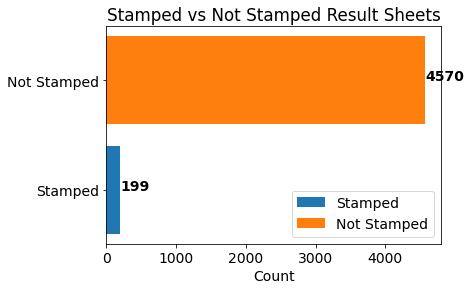

In [98]:
all_counts = df['Result_Sheet_Stamped'].value_counts().to_dict()
not_stamped_counts = {'Not Stamped': len(df) - all_counts.get(True, 0)}
stamped_counts = {'Stamped': all_counts.get(True, 0)}

fig, ax = plt.subplots()
ax.barh(list(stamped_counts.keys()), list(stamped_counts.values()), color='#1f77b4', label='Stamped')
ax.barh(list(not_stamped_counts.keys()), list(not_stamped_counts.values()), color='#ff7f0e', label='Not Stamped')

for i, v in enumerate(list(stamped_counts.values())):
    ax.text(v + 3, i, str(v), color='#000000', fontweight='bold')

for i, v in enumerate(list(not_stamped_counts.values())):
    ax.text(v + 3, i+1, str(v), color='#000000', fontweight='bold')

ax.set_title('Stamped vs Not Stamped Result Sheets')
ax.set_xlabel('Count')
ax.legend()
plt.show()


Let's take this further by looking at the local governments and how they rank by number of **'not stamped'** result sheets.

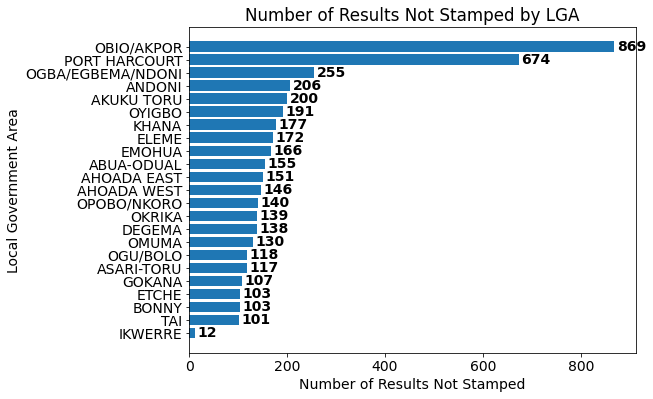

In [44]:
# calculate the number of results not stamped for each LGA
not_stamped = df.groupby('LGA')['Result_Sheet_Stamped'].apply(lambda x: sum(~x)).sort_values(ascending=False)

# create a horizontal bar chart with labels
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(not_stamped.index, not_stamped.values)
ax.set_xlabel('Number of Results Not Stamped')
ax.set_ylabel('Local Government Area')
ax.set_title('Number of Results Not Stamped by LGA')

# add labels for each bar
for i, v in enumerate(not_stamped.values):
    ax.text(v + 5, i, str(v), color='black', fontweight='bold', va='center')

# invert the y-axis so that the LGAs are listed from top to bottom
ax.invert_yaxis()

plt.show()


Let's put **'stamped'** and **'not stamped'** result sheets from the local governments side by side in a grouped bar chart.

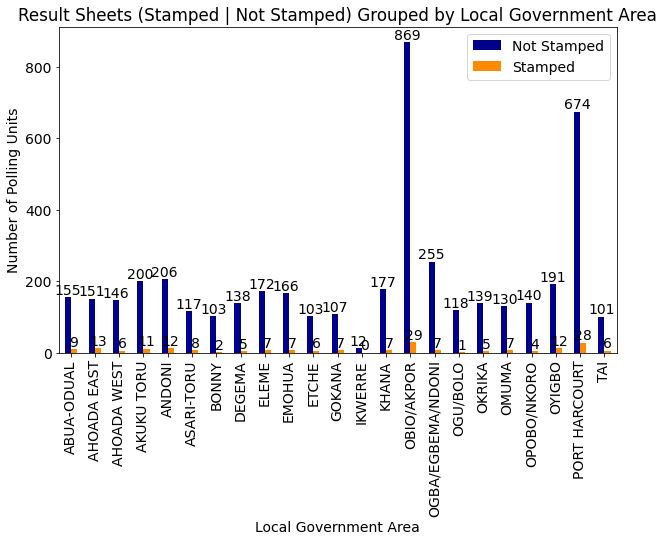

In [45]:
# Group the data by LGA and calculate the number of result sheets stamped and not stamped
grouped = df.groupby(['LGA'])['Result_Sheet_Stamped'].value_counts()
grouped = grouped.unstack().fillna(0)

# Create a bar chart of the data
ax = grouped.plot(kind='bar', figsize=(10,6), color=['darkblue', 'darkorange'])

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Add a legend and axis labels
ax.legend(['Not Stamped', 'Stamped'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Local Government Area')
ax.set_ylabel('Number of Polling Units')
ax.set_title('Result Sheets (Stamped | Not Stamped) Grouped by Local Government Area')

plt.show()


The interpretation is the following chart imply that most polling unit agents in Rivers State failed to stamp their result sheets. This raises concerns as to if INEC properly trained their ad-hoc staff on the right things to do.

In futherance of checking the result sheets for anomalies, let's check the data for the total number of mutilated polling unit result sheets by LGA

In [101]:
# create a boolean mask to filter out results that were mutilated
mutilated_mask = (df['Result_Sheet_Corrected'] == True)

# create a boolean mask to filter out results that were not mutilated
not_mutilated_mask = (df['Result_Sheet_Corrected'] == False)

# create a new DataFrame with only the results intact
not_mutilated = df.loc[not_mutilated_mask]

# create a new DataFrame with only the mutilated results
mutilated = df.loc[mutilated_mask]

# print the number of mutilated and intact results
print(f"Number of Results Mutilated: {len(mutilated)}")
print(f"Number of Results Intact: {len(not_mutilated)}")

Number of Results Mutilated: 791
Number of Results Intact: 3978


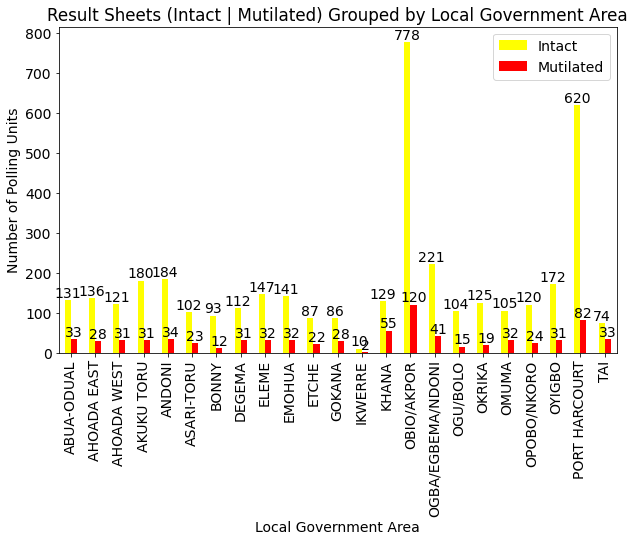

In [46]:
# Group the data by LGA and calculate the number of result sheets stamped and not stamped
grouped = df.groupby(['LGA'])['Result_Sheet_Corrected'].value_counts()
grouped = grouped.unstack().fillna(0)

# Create a bar chart of the data
ax = grouped.plot(kind='bar', figsize=(10,6), color=['yellow', 'red'])

# Add labels to the bars
for i in ax.containers:
    ax.bar_label(i, label_type='edge')

# Add a legend and axis labels
ax.legend(['Intact', 'Mutilated'], bbox_to_anchor=(1, 1))
ax.set_xlabel('Local Government Area')
ax.set_ylabel('Number of Polling Units')
ax.set_title('Result Sheets (Intact | Mutilated) Grouped by Local Government Area')

plt.show()


#Conclusion

The fact that 4570 result sheets were not stamped, while 199 sheets were stamped, and 791 result sheets were mutilated out of 4769 analyzed result sheets raises serious concerns about the credibility and transparency of the electoral process in Rivers State.

The failure to stamp result sheets as required by the Electoral Act 2022 is a violation of the law and undermines the integrity of the election. This can lead to suspicions of vote tampering and fraud, as it is difficult to verify the authenticity of result sheets that are not stamped.

The high number of mutilated result sheets is also a cause for concern as it raises questions about the handling and management of the result sheets during the election. This can also cast doubt on the accuracy of the final election results.

The issue of unstamped and mutilated result sheets highlights the need for INEC to ensure adequate training and supervision of its staff, particularly those responsible for handling and managing election materials. The failure to stamp result sheets could be an indication of poor training, oversight, and enforcement of regulations by INEC.

Overall, these findings raise serious questions about the credibility and transparency of the electoral process in Rivers State and emphasize the need for INEC to take necessary steps to address these concerns and ensure that future elections are free, fair, and credible.

#How did the Parties Perform? 😀

While the goal of this analysis is not to annouce any result, it is okay to look at the winner in the analysed set of results as this is publicly available information gotten from the [INEC IReV Portal](https://www.inecelectionresults.ng/).

The following code produces a bar chart showing the votes shared by the four major parties in the 25th February presendential election in Rivers State.

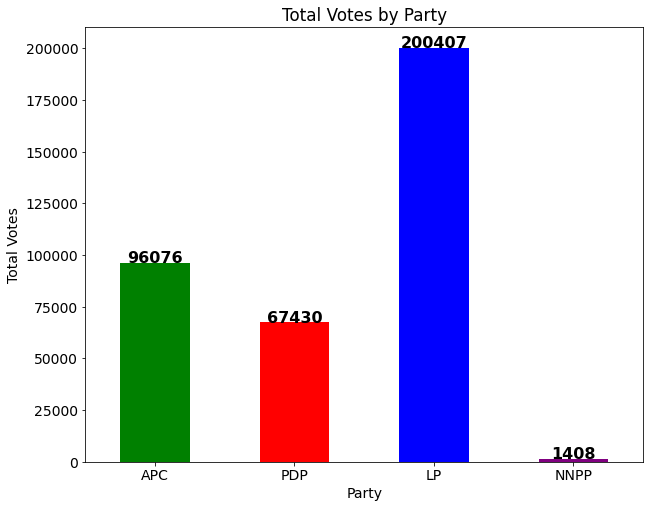

In [48]:
party_results = df[['APC', 'PDP', 'LP', 'NNPP']].sum()
party_results.plot(kind='bar', color=['green', 'red', 'blue', 'purple'], figsize=(10,8))
plt.title('Total Votes by Party')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=0)
for i, v in enumerate(party_results):
    plt.text(i, v + 50, str(v), ha='center', fontweight='semibold', fontsize=16)
plt.show()


##How did they perform in each LGA?

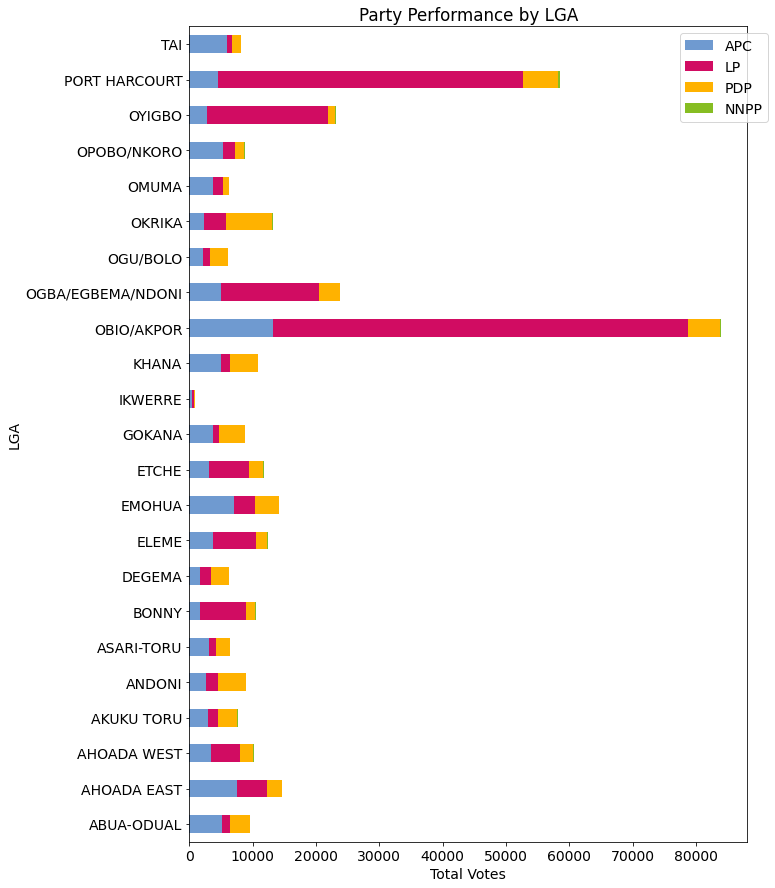

In [47]:
# Group data by LGA and sum votes for each party
grouped_data = df.groupby('LGA').sum()[['APC', 'LP', 'PDP', 'NNPP']]

# Calculate total valid votes for each LGA
#grouped_data['Valid_Votes'] = grouped_data.sum(axis=1)

# Sort data by Valid Votes in descending order
#grouped_data = grouped_data.sort_values(by='Valid_Votes', ascending=False)

# Create a horizontal bar chart to visualize party performance by LGA
grouped_data.plot(kind='barh', stacked=True, color = ['#6f9ad0', '#d10c62', '#ffb200', '#86bd22'], figsize=(10, 15))
plt.title('Party Performance by LGA')
plt.xlabel('Total Votes')
plt.ylabel('LGA')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()


##Appendix 
####A look at the remainin unvalidated data from Mark Essien's submission

Refer to the dataset published by [Mark Essien's](https://twitter.com/markessien) for Rivers State. The data marked by double asterisk is what we have analysed above while the data marked by single asterisk is what we look at next.

- [RIVERS_crosschecked.csv](https://drive.google.com/file/d/1DuHkMdwjZHWATwJBcnoGQ52cIVu9cAC1/view?usp=share_link)**
- [RIVERS_unsure.csv](https://drive.google.com/file/d/1oWHXWme_ziMjgTvqNde8QR_G38zjG-FH/view?usp=share_link)*
- [Rivers_notfound.csv](https://drive.google.com/file/d/1oWHXWme_ziMjgTvqNde8QR_G38zjG-FH/view?usp=share_link)

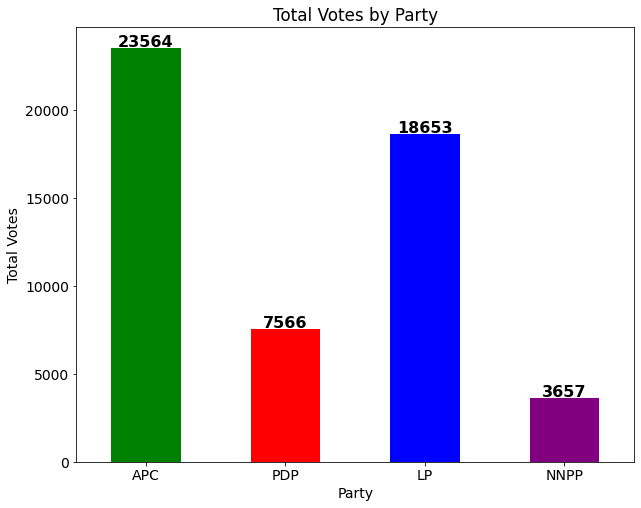

In [49]:
unsure_df = pd.read_csv('RIVERS_unsure.csv')

party_results = unsure_df[['APC', 'PDP', 'LP', 'NNPP']].sum()
party_results.plot(kind='bar', color=['green', 'red', 'blue', 'purple'], figsize=(10,8))
plt.title('Total Votes by Party')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=0)
for i, v in enumerate(party_results):
    plt.text(i, v + 50, str(v), ha='center', fontweight='semibold', fontsize=16)
plt.show()
